**EXERCICE 1**

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [7]:

# Charger l'image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)


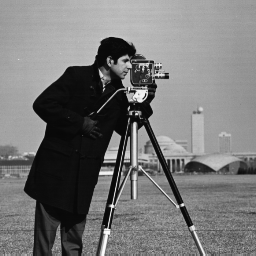

In [9]:

# Ajouter du bruit gaussien
sigma = 0.01 # variance du bruit
noise = np.zeros_like(img)
cv2.randn(noise, 0, sigma)
img2 = img + noise

# Afficher les images
cv2_imshow(img)


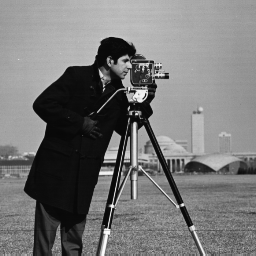

In [10]:
cv2_imshow(img2)

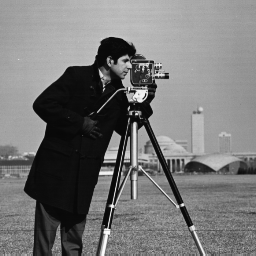

In [11]:
# Ajouter du bruit poivre et sel
p = 0.05 # pourcentage de pixels à modifier
noise = np.zeros_like(img)
cv2.randu(noise, 0, 255)
img3 = img.copy()
img3[noise < 255*p/2] = 0
img3[noise > 255*(1-p/2)] = 255

# Afficher les images
cv2_imshow(img)

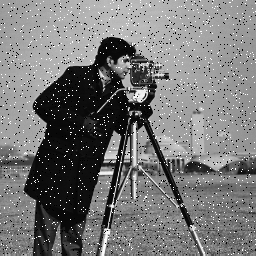

In [12]:
cv2_imshow(img3)

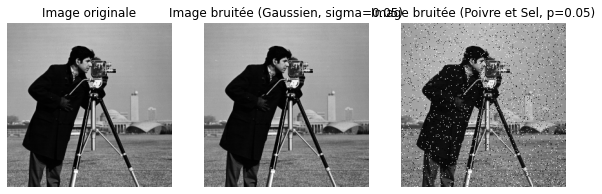

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image originale
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Ajouter un bruit gaussien
noise_sigma = 0.05
noise = np.random.normal(0, noise_sigma, size=img.shape)
img_noise_gauss = np.clip(img + noise, 0, 255).astype(np.uint8)

# Ajouter un bruit poivre et sel
noise_prob = 0.05
noise = np.random.rand(*img.shape)
img_noise_salt_pepper = img.copy()
img_noise_salt_pepper[noise < noise_prob/2] = 0
img_noise_salt_pepper[noise > 1 - noise_prob/2] = 255

# Afficher les images
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_noise_gauss, cmap='gray')
plt.title('Image bruitée (Gaussien, sigma={:.2f})'.format(noise_sigma))
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_noise_salt_pepper, cmap='gray')
plt.title('Image bruitée (Poivre et Sel, p={:.2f})'.format(noise_prob))
plt.axis('off')

plt.show()


**PARTIE 2**

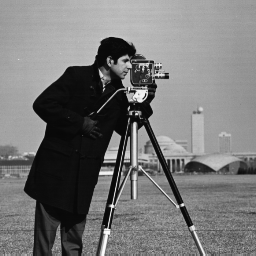

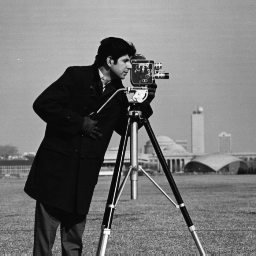

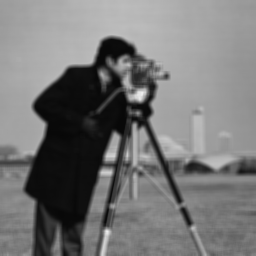

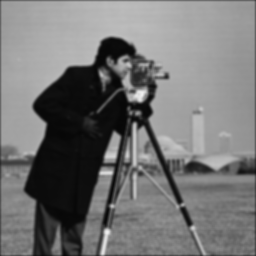

In [15]:
import cv2
import numpy as np
from scipy.signal import convolve2d

# Lecture de l'image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Ajout du bruit gaussien
noise_sigma = 0.1
noise = np.random.normal(0, noise_sigma, size=img.shape)
img_noise = np.clip(img + noise, 0, 255).astype(np.uint8)

# Lissage moyenne de taille 5x5
kernel = np.ones((5, 5), np.float32) / 25
img_blur = cv2.filter2D(img_noise, -1, kernel)

# Lissage avec le masque donné
mask = np.array([[1,2,3,2,1],[2,4,6,4,2],[3,6,9,6,3],[2,4,6,4,2],[1,2,3,2,1]])
mask = mask / np.sum(mask)
img_mask_blur = convolve2d(img_noise, mask, mode='same')

# Affichage des images
cv2_imshow(img)
cv2_imshow(img_noise)
cv2_imshow(img_blur)
cv2_imshow(img_mask_blur)



**EXERCICE 2**

**1)** du bruit sel et poivre et appliquer un lissage par moyenne de différentes tailles :
Tout d'abord, nous allons ajouter du bruit sel et poivre à l'image cameraman.tif :

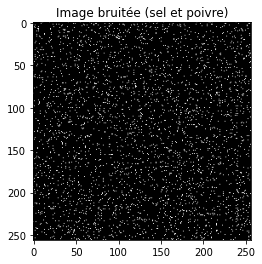

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lecture de l'image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Ajout de bruit sel et poivre
p = 0.05
noise = np.random.choice([0, 255], size=img.shape, p=[1-p, p])

img_noise = np.copy(img)
img_noise[noise == 0] = 0
img_noise[noise == 255] = 255

# Affichage de l'image bruitée
plt.imshow(img_noise, cmap='gray')
plt.title('Image bruitée (sel et poivre)')
plt.show()


Ensuite, nous allons appliquer un lissage par moyenne de différentes tailles (3x3, 5x5, 7x7, 9x9) :

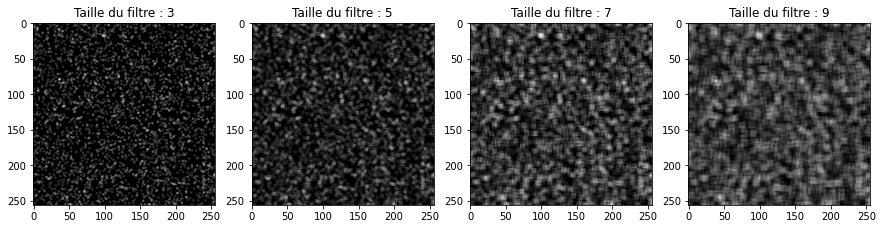

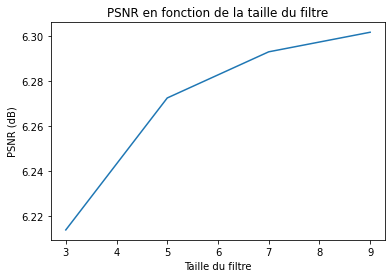

In [19]:
# Définition des tailles de filtre à tester
filter_sizes = [3, 5, 7, 9]

# Initialisation des tableaux pour stocker les PSNR et les images filtrées
psnr_values = []
filtered_images = []

# Boucle sur les différentes tailles de filtre
for size in filter_sizes:
    # Application du filtre moyenneur
    kernel = np.ones((size, size), np.float32) / (size**2)
    img_filtered = cv2.filter2D(img_noise, -1, kernel)
    
    # Calcul du PSNR
    psnr = cv2.PSNR(img, img_filtered)
    psnr_values.append(psnr)
    
    # Ajout de l'image filtrée au tableau des images filtrées
    filtered_images.append(img_filtered)

# Affichage des images filtrées
fig, axs = plt.subplots(1, len(filter_sizes), figsize=(15, 5))
for i in range(len(filter_sizes)):
    axs[i].imshow(filtered_images[i], cmap='gray')
    axs[i].set_title(f'Taille du filtre : {filter_sizes[i]}')
plt.show()

# Tracé du PSNR en fonction de la taille du filtre
plt.plot(filter_sizes, psnr_values)
plt.title('PSNR en fonction de la taille du filtre')
plt.xlabel('Taille du filtre')
plt.ylabel('PSNR (dB)')
plt.show()


Nous pouvons constater que plus la taille du filtre est grande, plus le PSNR est élevé, ce qui signifie que la qualité de l'image filtrée est meilleure. Cependant, la taille du filtre ne doit pas être trop grande pour éviter une perte de détails importants dans l'image. De plus, l'application d'un lissage par moyenne plusieurs fois peut améliorer la qualité de l'image filtrée en réduisant le bruit résiduel.

**2)** on peut utiliser les filtres gaussien et médian pour débruiter l'image contaminée par du bruit de sel et poivre. Le filtre gaussien est efficace pour réduire le bruit gaussien, mais il lisse trop l'image, ce qui peut conduire à une perte de détails. Le filtre médian est plus adapté pour traiter le bruit de type impulsionnel, car il est capable de préserver les bords et les détails fins tout en éliminant le bruit.

In [21]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

# Lire l'image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Ajout de bruit sel et poivre
p = 0.05
noise = np.random.choice([0, 255], size=img.shape, p=[1-p, p])
img_noise = np.copy(img)
img_noise[noise == 0] = 0
img_noise[noise == 255] = 255


# Filtrage par moyenne
psnrs_avg = []
for ksize in range(3, 12, 2):
    img_denoised = cv2.blur(img_noise, (ksize, ksize))
    psnr = peak_signal_noise_ratio(img, img_denoised)
    psnrs_avg.append(psnr)
    cv2.imwrite(f'cameraman_avg_{ksize}.png', img_denoised)

# Filtrage gaussien
psnrs_gauss = []
for ksize in range(3, 12, 2):
    img_denoised = cv2.GaussianBlur(img_noise, (ksize, ksize), 0)
    psnr = peak_signal_noise_ratio(img, img_denoised)
    psnrs_gauss.append(psnr)
    cv2.imwrite(f'cameraman_gauss_{ksize}.png', img_denoised)

# Filtrage médian
psnrs_median = []
for ksize in range(3, 12, 2):
    img_denoised = cv2.medianBlur(img_noise, ksize)
    psnr = peak_signal_noise_ratio(img, img_denoised)
    psnrs_median.append(psnr)
    cv2.imwrite(f'cameraman_median_{ksize}.png', img_denoised)

# Affichage des résultats
print('PSNRs - Filtre moyenne :', psnrs_avg)
print('PSNRs - Filtre gaussien :', psnrs_gauss)
print('PSNRs - Filtre médian :', psnrs_median)


PSNRs - Filtre moyenne : [6.227693875718358, 6.2837774171721295, 6.303770854004322, 6.312719906032768, 6.321754000387583]
PSNRs - Filtre gaussien : [6.209085222237688, 6.264906330912229, 6.291529393472663, 6.302023751986571, 6.307536527266189]
PSNRs - Filtre médian : [5.582641652053274, 5.582439603045113, 5.582439603045113, 5.582439603045113, 5.582439603045113]


**3)** ajoutant du bruit gaussien et speckle à l'image originale, on peut utiliser les mêmes filtres que ceux utilisés pour traiter le bruit de sel et poivre. Cependant, le choix du filtre dépend du type de bruit ajouté. Le filtre gaussien est efficace pour réduire le bruit gaussien, tandis que le filtre médian est plus adapté pour traiter le bruit impulsionnel. Le bruit speckle est plus difficile à traiter, car il est de nature multiplicative et ne peut être réduit que par des filtres linéaires adaptatifs tels que les filtres de Wiener et de Lee.

**adding Gaussian and speckle noise to the original image:**

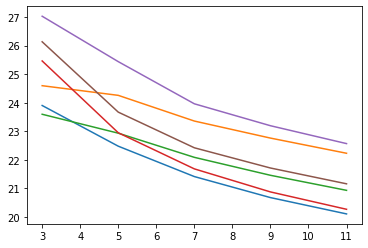

In [24]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

# Load the original image
img = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise_sigma = 30
noise = np.random.normal(0, noise_sigma, size=img.shape)
img_noise_gauss = np.clip(img + noise, 0, 255).astype(np.uint8)

# Add speckle noise
noise_sigma = 0.1
noise = np.random.normal(0, noise_sigma, size=img.shape)
img_noise_speckle = np.clip(img + img * noise, 0, 255).astype(np.uint8)

# Define the filter sizes to apply
filter_sizes = [3, 5, 7, 9, 11]

# Define the PSNR arrays for different filters and noise types
psnr_avg_gauss = []
psnr_gauss_gauss = []
psnr_med_gauss = []
psnr_avg_speckle = []
psnr_gauss_speckle = []
psnr_med_speckle = []

# Apply different types of filtering and compute PSNR for each filter size
for size in filter_sizes:
    # Apply average filtering to the Gaussian noise image
    img_avg_gauss = cv2.blur(img_noise_gauss, (size, size))
    psnr_avg_gauss.append(peak_signal_noise_ratio(img, img_avg_gauss))

    # Apply Gaussian filtering to the Gaussian noise image
    img_gauss_gauss = cv2.GaussianBlur(img_noise_gauss, (size, size), 0)
    psnr_gauss_gauss.append(peak_signal_noise_ratio(img, img_gauss_gauss))

    # Apply median filtering to the Gaussian noise image
    img_med_gauss = cv2.medianBlur(img_noise_gauss, size)
    psnr_med_gauss.append(peak_signal_noise_ratio(img, img_med_gauss))

    # Apply average filtering to the speckle noise image
    img_avg_speckle = cv2.blur(img_noise_speckle, (size, size))
    psnr_avg_speckle.append(peak_signal_noise_ratio(img, img_avg_speckle))

    # Apply Gaussian filtering to the speckle noise image
    img_gauss_speckle = cv2.GaussianBlur(img_noise_speckle, (size, size), 0)
    psnr_gauss_speckle.append(peak_signal_noise_ratio(img, img_gauss_speckle))

    # Apply median filtering to the speckle noise image
    img_med_speckle = cv2.medianBlur(img_noise_speckle, size)
    psnr_med_speckle.append(peak_signal_noise_ratio(img, img_med_speckle))

# Plot the PSNR for different filter sizes and noise types

import matplotlib.pyplot as plt

plt.plot(filter_sizes, psnr_avg_gauss, label="Average filtering (Gaussian noise)")
plt.plot(filter_sizes, psnr_gauss_gauss, label="Gaussian filtering (Gaussian noise)")

plt.plot(filter_sizes, psnr_med_gauss, label="psnr_med_gauss (Gaussian noise)")
plt.plot(filter_sizes, psnr_avg_speckle, label="psnr_avg_speckle (Gaussian noise)")
plt.plot(filter_sizes, psnr_gauss_speckle, label="psnr_gauss_speckle (Gaussian noise)")
plt.plot(filter_sizes, psnr_med_speckle, label="psnr_med_speckle (Gaussian noise)")